### 岭回归

In [1]:
# 创建数据
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

### 将数据进行过拟合的处理

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [4]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# 将多项式回归的 degree 设置为 20，误差是非常的大
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.94010867772357

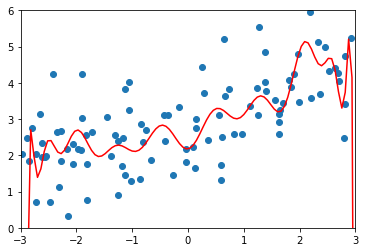

In [7]:
# 绘制图像
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

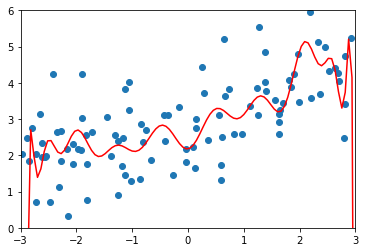

In [9]:
# 单独将根据预测数据绘制模型函数图像的方法进行封装，参数传入生成器
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)

### 使用岭回归

In [10]:
from sklearn.linear_model import Ridge

In [11]:
#普通实例化 ridge 的方法
ridge = Ridge(alpha=1)

In [14]:
#设置管道，创建岭回归，将线性回归改成岭回归
def RidgenomialRegression(degree,alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha = alpha))
    ])
# 从上面可知 degree =20的时候，是过拟合的，为了让数据拟合度变低所以要加一个很小的 alpha
ridge1_reg = RidgenomialRegression(degree=20,alpha=0.0001)

In [16]:
#查看拟合程度
ridge1_reg.fit(X_train,y_train)
y_predict = ridge1_reg.predict(X_test)
# 可以看到结果，这里的误差已经非常小了
mean_squared_error(y_test, y_predict)

1.3233492754136291

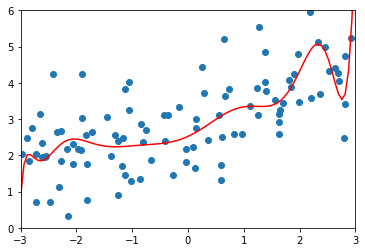

In [18]:
#显示图像,可以看到图像非常的缓和
plot_model(ridge1_reg)

### 为岭回归设置不同的超参数 
超参数是 alpha，不断地将 alpha 变大。<br/>
其中可以看出并不是 alpha 越大越好，它也是有一个界限的

In [20]:
# alpha = 1
ridge2_reg = RidgenomialRegression(degree=20,alpha=1)
ridge2_reg.fit(X_train,y_train)
y2_predict = ridge2_reg.predict(X_test)
# 当 alpha =1 的时候数据的误差更小了
mean_squared_error(y_test, y2_predict)

1.1888759304218461

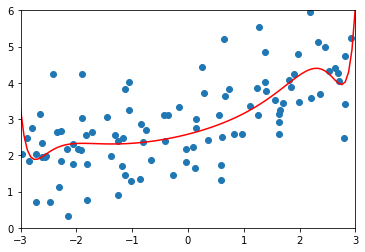

In [21]:
plot_model(ridge2_reg)

In [22]:
# alpha = 100000
ridge3_reg = RidgenomialRegression(degree=20,alpha=100000)
ridge3_reg.fit(X_train,y_train)
y3_predict = ridge3_reg.predict(X_test)
# 当 alpha =100000 的时候数据的误差打了一点，但是还是较小
mean_squared_error(y_test, y3_predict)

1.8360988778885547

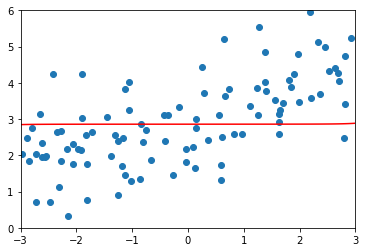

In [24]:
# 由于alpha 越来越大，相应的 theta 就要越来越小，theta 要不断的趋近于 0，最终成为一条直线
plot_model(ridge3_reg)